In [63]:
import json
import pandas as pd

with open("G:/My Drive/GitHub/Experiments-with-CORE/data/GINCO-mapped-to-GINCORE.json") as file:
    dataset = json.load(file)


 We'll create an additional parameter for each document: "full_text" with paragraphs joint into one. Following previous research, we will use deduplicated text (only paragraphs with attribute duplicate False).

In [64]:
for instance in dataset:
    paragraphs = instance["paragraphs"]
    # Removing duplicates:
    paragraphs = [p for p in paragraphs if not p["duplicate"]]

    # Joining texts:
    if len(paragraphs) > 0:
        instance_dedup_text = " <p/> ".join([p["text"] for p in paragraphs])

        # Assigning texts to a new field:
        instance["full_text"] = instance_dedup_text

dataset[0]

{'id': '3949',
 'url': 'http://www.pomurje.si/aktualno/sport/zimska-liga-malega-nogometa/',
 'crawled': '2014',
 'hard': False,
 'paragraphs': [{'text': 'Šport', 'duplicate': False, 'keep': True},
  {'text': 'Zimska liga malega nogometa sobota, 12.02.2011',
   'duplicate': False,
   'keep': True},
  {'text': 'avtor: Tonček Gider', 'duplicate': False, 'keep': True},
  {'text': "V 7. krogu zimske lige v malem nogometu v Križevcih pri Ljutomeru je v prvi ligi vodilni 100 plus iz Križevec izgubil s tretjo ekipo na lestvici Rock'n roll iz Križevec z rezultatom 1:2, druga na lestvici Top Finedika iz Križevec je bila poražena z ekipo Bar Milene iz Ključarovec z rezultatom 7:8. V drugi križevski ligi je vodilni Cafe del Mar iz Vučje vasi premagal Montažo Vrbnjak iz Stare Nove vasi z rezultatom 3:2.",
   'duplicate': False,
   'keep': True},
  {'text': 'oglasno sporočilo', 'duplicate': False, 'keep': True},
  {'text': 'Ocena', 'duplicate': False, 'keep': True},
  {'text': 'Komentiraj Za komenti

Import the dataset into a pandas Data Frame:

In [65]:
dataset_df = pd.DataFrame(dataset)

dataset_df.head()

,id,url,crawled,hard,paragraphs,primary_level_1,primary_level_2,primary_level_3,secondary_level_1,secondary_level_2,secondary_level_3,tertiary_level_1,tertiary_level_2,tertiary_level_3,split,domain,GINCORE,full_text
0,3949,http://www.pomurje.si/aktualno/sport/zimska-li...,2014,False,"[{'text': 'Šport', 'duplicate': False, 'keep':...",News/Reporting,News/Reporting,News/Reporting,,,,,,,test,www.pomurje.si,News,"Šport <p/> Zimska liga malega nogometa sobota,..."
1,3726,http://www.ss-sezana.si/sss/index.php?option=c...,2014,False,"[{'text': 'JEDILNIK', 'duplicate': False, 'kee...",Information/Explanation,Information/Explanation,Information/Explanation,,,,,,,train,www.ss-sezana.si,Information/Explanation,JEDILNIK <p/> Iskalnik <p/> Poglavitni cilj pr...
2,5621,http://www.kamnik-starejsi.si/novice/144-sodel...,2014,False,"[{'text': 'Projekt INNOVAge in zavod Oreli', '...",Promotion of Services,Promotion of Services,Promotion,Opinion/Argumentation,Opinion/Argumentation,Opinion/Argumentation,Information/Explanation,Information/Explanation,Information/Explanation,train,www.kamnik-starejsi.si,Promotion,Projekt INNOVAge in zavod Oreli <p/> Zavod Ore...
3,3776,http://www.radiocelje.si/novica.php?id=13007&a...,2014,False,"[{'text': 'V novembru, mesecu preprečevanja od...",News/Reporting,News/Reporting,News/Reporting,,,,,,,train,www.radiocelje.si,News,"V novembru, mesecu preprečevanja odvisnosti, b..."
4,2102,http://www.mtv.si/novice/selena-gomez-ponudila...,2014,False,[{'text': 'Selena Gomez ponudila v poslušanje ...,Opinionated News,Opinionated News,Opinionated News,,,,,,,test,www.mtv.si,News,Selena Gomez ponudila v poslušanje novi album ...


Inspect the label distribution:

In [66]:
dataset_df.GINCORE.value_counts()

Promotion                     209
News                          204
Information/Explanation       130
Opinion/Argumentation         114
List of Summaries/Excerpts    106
Forum                          52
Instruction                    38
Other                          34
Review                         17
Legal/Regulation               17
Announcement                   17
Correspondence                 16
Call                           11
Research Article                9
Interview                       8
Recipe                          6
Prose                           6
Lyrical                         4
FAQ                             3
Script/Drama                    1
Name: GINCORE, dtype: int64

We should discard categories with less than 5 instances, as well as the GINCORE categories that do not appear in the CORE dataset (for better comparability).

In [67]:
discarded_labels = ["Script/Drama", "FAQ", "Lyrical", "Announcement", "Call", "Correspondence", "List of Summaries/Excerpts", "Other"]

cleaned_dataset = []

for i in dataset:
    if i["GINCORE"] not in discarded_labels:
        cleaned_dataset.append(i)

len(cleaned_dataset)

810

In [68]:
cleaned_dataset_df = pd.DataFrame(cleaned_dataset)
cleaned_dataset_df.head()

,id,url,crawled,hard,paragraphs,primary_level_1,primary_level_2,primary_level_3,secondary_level_1,secondary_level_2,secondary_level_3,tertiary_level_1,tertiary_level_2,tertiary_level_3,split,domain,GINCORE,full_text
0,3949,http://www.pomurje.si/aktualno/sport/zimska-li...,2014,False,"[{'text': 'Šport', 'duplicate': False, 'keep':...",News/Reporting,News/Reporting,News/Reporting,,,,,,,test,www.pomurje.si,News,"Šport <p/> Zimska liga malega nogometa sobota,..."
1,3726,http://www.ss-sezana.si/sss/index.php?option=c...,2014,False,"[{'text': 'JEDILNIK', 'duplicate': False, 'kee...",Information/Explanation,Information/Explanation,Information/Explanation,,,,,,,train,www.ss-sezana.si,Information/Explanation,JEDILNIK <p/> Iskalnik <p/> Poglavitni cilj pr...
2,5621,http://www.kamnik-starejsi.si/novice/144-sodel...,2014,False,"[{'text': 'Projekt INNOVAge in zavod Oreli', '...",Promotion of Services,Promotion of Services,Promotion,Opinion/Argumentation,Opinion/Argumentation,Opinion/Argumentation,Information/Explanation,Information/Explanation,Information/Explanation,train,www.kamnik-starejsi.si,Promotion,Projekt INNOVAge in zavod Oreli <p/> Zavod Ore...
3,3776,http://www.radiocelje.si/novica.php?id=13007&a...,2014,False,"[{'text': 'V novembru, mesecu preprečevanja od...",News/Reporting,News/Reporting,News/Reporting,,,,,,,train,www.radiocelje.si,News,"V novembru, mesecu preprečevanja odvisnosti, b..."
4,2102,http://www.mtv.si/novice/selena-gomez-ponudila...,2014,False,[{'text': 'Selena Gomez ponudila v poslušanje ...,Opinionated News,Opinionated News,Opinionated News,,,,,,,test,www.mtv.si,News,Selena Gomez ponudila v poslušanje novi album ...


--> 192 texts were discarded, 810 texts were used.

In [69]:
final_dataset = cleaned_dataset_df[["full_text","GINCORE"]]
final_dataset.columns = ["text", "labels"]

final_dataset.head()

,text,labels
0,"Šport <p/> Zimska liga malega nogometa sobota,...",News
1,JEDILNIK <p/> Iskalnik <p/> Poglavitni cilj pr...,Information/Explanation
2,Projekt INNOVAge in zavod Oreli <p/> Zavod Ore...,Promotion
3,"V novembru, mesecu preprečevanja odvisnosti, b...",News
4,Selena Gomez ponudila v poslušanje novi album ...,News


In [70]:
len(final_dataset.labels.unique())

12

As we are using deduplicated text, it is possible that some of the instances have no text (nan instead of text string). We need to drop them.

In [71]:
final_dataset[final_dataset.isnull().any(axis=1)]

,text,labels
49,NaN,Opinion/Argumentation
163,NaN,Promotion
253,NaN,Opinion/Argumentation
275,NaN,Opinion/Argumentation
293,NaN,Opinion/Argumentation
295,NaN,News
385,NaN,Information/Explanation
413,NaN,Promotion
421,NaN,Legal/Regulation
430,NaN,Instruction


In [81]:
final_dataset.dropna(subset=["text"], inplace=True)
final_dataset.describe()

C:\Users\TajaK\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,text,labels
count,797,797
unique,797,12
top,"Šport <p/> Zimska liga malega nogometa sobota,...",Promotion
freq,1,206


Create a stratified split. First split the dataset into train and devtest and then split the devtest into dev and test. The final split will be 60:20:20.

In [82]:
import numpy as np
from sklearn.model_selection import train_test_split

train, devtest = train_test_split(final_dataset, test_size=0.4, random_state=42, shuffle = True, stratify = final_dataset.labels)

In [75]:
train.describe()

,text,labels
count,478,478
unique,478,12
top,2. igralec sveta in verjetno najboljši igralec...,Promotion
freq,1,123


In [83]:
devtest.labels.value_counts()

Promotion                  83
News                       81
Information/Explanation    52
Opinion/Argumentation      44
Forum                      21
Instruction                15
Legal/Regulation            6
Review                      6
Research Article            4
Interview                   3
Prose                       2
Recipe                      2
Name: labels, dtype: int64

In [84]:
test, dev = train_test_split(devtest, test_size=0.5, random_state=42, shuffle = True, stratify = devtest.labels)

Observe the distribution of the labels in all sets.

<AxesSubplot:xlabel='value', ylabel='Count'>

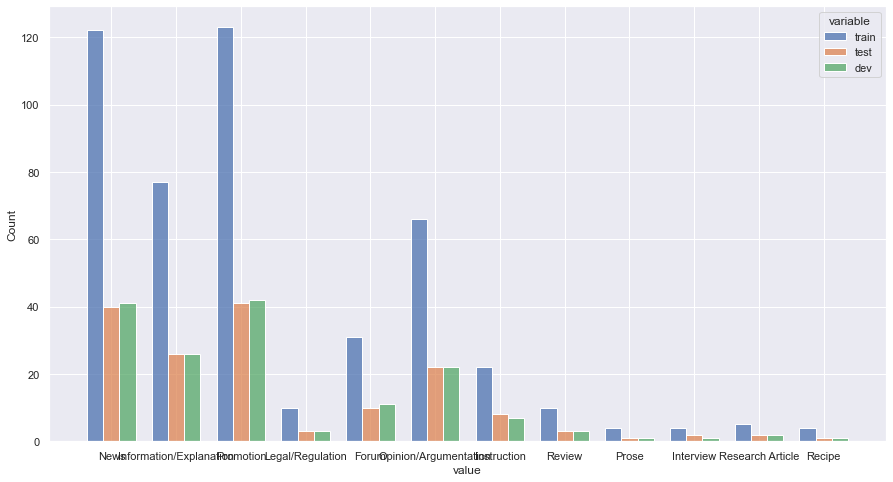

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# make dataframe
df = pd.DataFrame({"train":train.labels, "test":test.labels, "dev": dev.labels})

# plot melted dataframe in a single command
sns.set(rc = {'figure.figsize':(15,8)})

sns.histplot(df.melt(), x='value', hue='variable',
             multiple='dodge', shrink=.75, bins=20)


In [86]:
df.describe()

,train,test,dev
count,478,159,160
unique,12,12,12
top,Promotion,Promotion,Promotion
freq,123,41,42


Save the new files as csv

In [80]:
train.to_csv("GINCO_train.csv", index=False)
test.to_csv("GINCO_test.csv", index=False)
dev.to_csv("GINCO_dev.csv", index=False)